<h1>Voting Systems


This project investigates the diferences in three voting systems. The three that I compare are plurality, runoff, and approval.

Plurality voting is a very common system in which the candidate that receives the most votes wins.

In runoff voting, there are multiple stages. Each stage, the loser is kicked off the ballot and votes are recast. There are multiple versions but what I implemented is that you continue throwing out the loser until there is a winner.

Approval voting is a system where the voters can cast as many votes as they want. They vote for any candidates they would be okay with winning. All the votes are counted and the candidate with the most votes wins.

All of these voting systems are different, but do they change the outcome of the election? That is what my project will investigate.

In [32]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Setup Simulations

In [33]:
def make_data(pop_size=10_000, num_dims=2, num_choices=3):
    """
    Randomly creates num_choices candidates and pop_size constituents.
    :param pop_size: number of voters
    :param num_dims: number of dimensions in the belief space
    :param num_choices: number of candidates
    :return: returns the population, candidates, distance in the belief space, and the colors of the candidates
    """
    pop_size = pop_size
    num_dims = num_dims
    num_choices = num_choices
    
    colors = ['red', 'green', 'blue', 'purple', 'yellow', 'cyan', 'magenta', 'orange', 'pink', 'brown', 'black', 'white'][:num_choices]
    
    pop = np.random.random((pop_size, num_dims)) * 2 - 1
    choices = np.random.random((num_choices, num_dims)) * 2 - 1
    
    dists = []
    for p in pop:
        d = []
        for c in choices:
            d.append(np.linalg.norm(p - c))
        dists.append(d)
    return pop, choices, dists, colors

In [34]:
pop, choices, dists, colors = make_data()

# this cell sets up some very contrived examples that will help illustrate points later.

r_choices = np.array([[ 0.66040423, -0.42079233], [ 0.50239561, 0.82256956], [-0.17244763, -0.86542893]])
choices = np.array([[-0.3, -0.3], [0.1, 0.1], [0.25, 0.25]])
e_choices = np.array([[-1, -1], [1, 1], [0, 0]])

dists = []
for p in pop:
    d = []
    for c in choices:
        d.append(np.linalg.norm(p - c))
    dists.append(d)
r_dists = []
for p in pop:
    d = []
    for c in r_choices:
        d.append(np.linalg.norm(p - c))
    r_dists.append(d)
e_dists = []
for p in pop:
    d = []
    for c in e_choices:
        d.append(np.linalg.norm(p - c))
    e_dists.append(d)

In [35]:
def plot_data(pop, choices, colors):
    """
    Plots the data on a scatter plot representing the belief space
    :param pop: the voters
    :param choices: the candidates
    :param colors: colors to plot the candidates
    """
    if len(pop[0]) == 1:
        plt.figure()
        plt.eventplot(pop[:, 0], orientation='horizontal', linewidths=1)
        for i in range(len(choices)):
            plt.eventplot(choices[i], orientation='horizontal', linewidths=3, colors=colors[i])
        plt.axis('off')
        plt.show()
    if len(pop[0]) == 2:
        plt.scatter(pop[:, 0], pop[:, 1], s=1)
        plt.scatter(choices[:, 0], choices[:, 1], s=40, c=colors)
        plt.show()
    if len(pop[0]) == 3:
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        ax.scatter(pop[:, 0], pop[:, 1], pop[:, 2], s=1)
        ax.scatter(choices[:, 0], choices[:, 1], choices[:, 2], s=40, c=colors)
        plt.show()

In [36]:
def print_approvals(pop, choices, dists, show=True):
    """
    Prints one over the average distance of all the voters from each candidate in the belief space.
    :param pop: the voters
    :param choices: the candidates
    :param dists: the distance of each voter from each candidate
    """
    avg_d = {}
    max = [0, 0]
    for i in range(len(choices)):
        avg_d[i] = sum([d[i] for d in dists]) / len(pop)
        if show:
            print(f"Average 'approval' of {colors[i]}: {1/avg_d[i]:.3f}")
        if 1/avg_d[i] > max[0]:
            max[0] = 1/avg_d[i]
            max[1] = colors[i]
    if show:
        print()
        for i in range(len(choices)):
            print(f"Average distance of {colors[i]} from other candidates: {sum([np.linalg.norm(choices[i] - o) for o in choices]) / (len(choices) - 1):.3f}")
    return max[1]

In [37]:
def plurality(pop, choices, dists, colors, graph=True, o=True, show=True):
    """
    Simulates a vote using the plurality voting scheme and prints the results.
    :param pop: the voters
    :param choices: the candidates
    :param dists: the distance of each voter from each candidate
    :param colors: color for each candidate
    :param graph: boolean to show a graph or not
    :param o: boolean for if this is original caller of function
    """
    prefs = []
    for d in dists:
        prefs.append(np.argmin(d))
    unique_elements, counts = np.unique(prefs, return_counts=True)    
    if o and show:
        print(f"=====  Plurality  =====")
    
    if show:
        for i in range(len(choices)):
            print(f"{colors[i]}: {prefs.count(i)}")
        print()
        print(f"{colors[np.argmax(counts)]} wins!")
        print()
        print()
    if graph:
        plt.scatter(pop[:, 0], pop[:, 1], s=1, c=[colors[i] for i in prefs])
        plt.scatter(choices[:, 0], choices[:, 1], s=40, c=[colors[i] for i in range(len(choices))])
        plt.show()
    return colors[np.argmax(counts)]

In [38]:
def instant_runoff(pop, choices, dists, colors, graph=True, show=True):
    """
    Simulates a vote using the instant runoff voting scheme and prints the results.
    :param pop: the voters
    :param choices: the candidates
    :param dists: the distance of each voter from each candidate
    :param colors: color for each candidate
    :param graph: boolean to show a graph or not
    """
    if show:
        print(f"=====  Runoff  =====")
    choices = np.copy(choices)
    dists = list(np.copy(dists))
    colors = list(np.copy(colors))
    while len(choices) > 2:
        prefs = []
        for d in dists:
            prefs.append(np.argmin(d))
        unique_elements, counts = np.unique(prefs, return_counts=True)
        if show:
            for i in range(len(choices)):
                print(f"{colors[i]}: {prefs.count(i)}")
            print()
        choices = list(choices)
        choices.pop(np.argmin(counts))
        choices = np.array(choices)
        if show:
            print(f"Removing {colors[np.argmin(counts)]}")
        colors.pop(np.argmin(counts))

        for i in range(len(dists)): 
            d = list(dists[i])
            d.pop(np.argmin(counts))
            dists[i] = d
    return plurality(pop, choices, dists, colors, graph=graph, o=False, show=show)
    
    

In [39]:
def approval(pop, choices, dists, colors, graph=True, show=True):
    """
    Simulates a vote using the approval voting scheme and prints the results.
    :param pop: the voters
    :param choices: the candidates
    :param dists: the distance of each voter from each candidate
    :param colors: color for each candidate
    :param graph: boolean to show a graph or not
    """
    if show:
        print(f"=====  Approval  =====")
    approvals = {}
    for i in range(len(choices)):
        approvals[i] = 0
    for d in dists:
        for i in range(len(d)):
            if d[i] < 1:
                approvals[i] += 1
    
    max = 0
    for key in approvals.keys():
        if show:
            print(f"{colors[key]}: {approvals[key]}")
        if approvals[key] > approvals[max]:
            max = key
    if show:
        print()
        print(f"{colors[max]} wins!")
        print()
        print()
    if graph:
        plt.scatter(pop[:, 0], pop[:, 1], s=1)
        plt.scatter(choices[:, 0], choices[:, 1], s=40, c=colors)
        plt.gca().set_xlim(-1, 1)
        plt.gca().set_ylim(-1, 1)
        for i in range(len(choices)):
            plt.gca().add_patch(plt.Circle(choices[i], 1, fill=True, color=colors[i], alpha=0.1))
        plt.show()
    return colors[max]

In [40]:
def mass_analysis(num_runs, min_cans = 2, max_cans = 10):
    data = {"plurality":[], "runoff":[], "approval":[]}
    for n in range(min_cans, max_cans + 1):
        print(f"On {n} candidates")
        for key in data.keys():
            data[key].append([n, 0])
            j = len(data[key]) - 1
        for i in range(num_runs):
            p, c, d, cols = make_data(num_choices=n)
            best = print_approvals(p, c, d, show=False)
            data["plurality"][j][1] += plurality(p, c, d, cols, graph=False, show=False) == best
            data["runoff"][j][1] += instant_runoff(p, c, d, cols, graph=False, show=False) == best
            # if approval(p, c, d, cols, graph=False, show=False) != best:
            #     plurality(p, c, d, cols)
            #     instant_runoff(p, c, d, cols)
            #     approval(p, c, d, cols)
            #     print_approvals(p, c, d)
            data["approval"][j][1] += approval(p, c, d, cols, graph=False, show=False) == best
    return data

<h1>Begin Analysis

### Situation

I have contrived an election with three candidates. In this example there is a two-dimensional "belief space." This space represents all the possible beliefs of a person in this world. Each axis ranges from -1 to 1. For this example, I have chosen to uniformly distribute the voters on this belief space. The closer two people are in the belief space, the more their opinions align. This means that the closest candidate to each person is who they align with the most, thus who they will vote for. In the simulation, I assume everyone votes purely based on their positions in the belief space. 


### Simulation

The way the simulation works is by generating the candidates as a position in the belief space, generating voters as a position, then calculating the distance between each voter and each candidate. These distances are used in each voting algorithm. Each candidate will be represented by color in plots. Results of votes will show the voters as the color of the candidate they voted for.

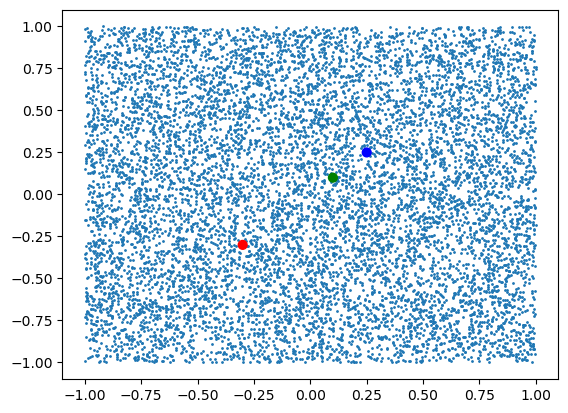

In [41]:
plot_data(pop, choices, colors)

### Plurality

This one is pretty simple to understand because it is widely used. Since red is the closest candidate to the largest number of voters, it wins.

=====  Plurality  =====
red: 4018
green: 2566
blue: 3416

red wins!



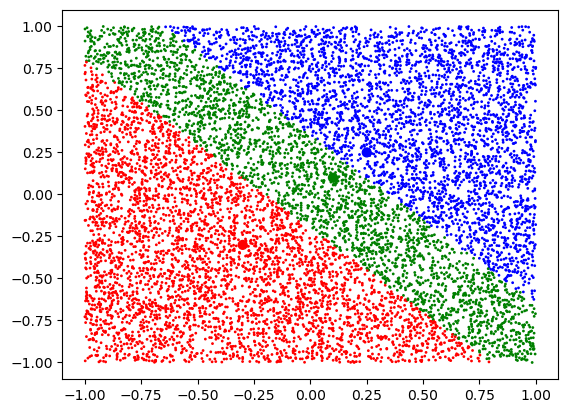

'red'

In [42]:
plurality(pop, choices, dists, colors)

### Runoff

This is where things get interesting. In the first round, we see the same results as plurality. Then when green gets kicked off, we see that most of the green voters vote for blue which makes it ultimately win. 

This phenomenon highlights the main issue with plurality which is that it only really works with two options. It does not work with more than two options because only the top choice of each voter is considered. In the example, way more of the green voters would prefer blue to red, yet the existence of the green candidate made red win because it took votes away from blue.

With runoff, on the other hand, the green voters still get to express support for green in the first round, but when it is determined that green will not be winning, they get to pick their next preference.

=====  Runoff  =====
red: 4018
green: 2566
blue: 3416

Removing green
red: 4716
blue: 5284

blue wins!


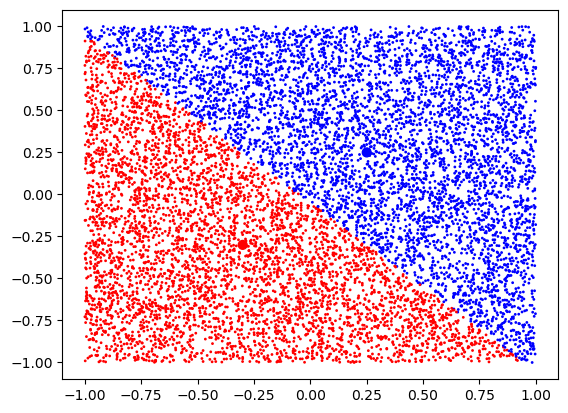

'blue'

In [43]:
instant_runoff(pop, choices, dists, colors)

### Approval

This type of voting is a little bit different from the others in the fact that instead of choosing which candidate you like the most or even ranking them, you select all that you would be okay with getting elected. In the simulation, I implemented this by choosing a certain "approval radius" inside which a voter will approve and outside they will not. So basically, the candidates have circles around them and if the voter is in a candidate's circle, they approve of them. 

This method basically aims to minimize the unhappiness by simply choosing the candidate most people would be okay with even if it is not their first choice. For example, in the runoff vote, blue won because without green, most people prefer it. However, all the red voters would prefer green to blue because green is closer to red. Similarly, all the blue voters prefer green to red because it is closer to blue. In this sense, approval sort of finds a compromise.

=====  Approval  =====
red: 6426
green: 7645
blue: 6758

green wins!



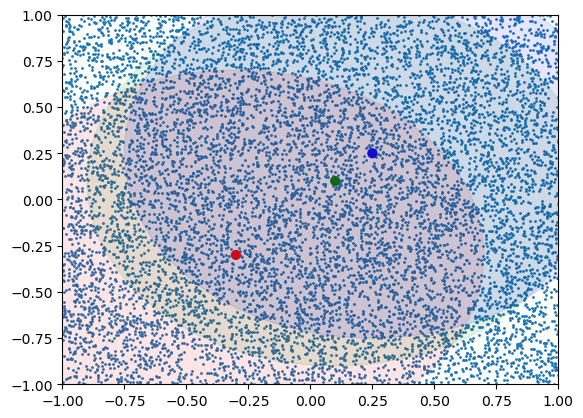

'green'

In [44]:
approval(pop, choices, dists, colors)

This cell prints out the inverse of the average distance to each candidate in the belief space. This is a metric that quantifies how good of a choice each candidate would be. This is not based on any voting system, simply the beliefs of the candidates and voters. 

I also print out the average distance of each candidate from the other candidates. This gives a measure of how polar each candidate is relative to the others.

In [45]:
print_approvals(pop, choices, dists)

Average 'approval' of red: 1.191
Average 'approval' of green: 1.302
Average 'approval' of blue: 1.228

Average distance of red from other candidates: 0.672
Average distance of green from other candidates: 0.389
Average distance of blue from other candidates: 0.495


'green'

### A non-contrived example

In the above example, I did admittedly come up with the candidates specifically to cause the voting discrepancy. It works because all the candidates fall on one line. This example below, however, came about when using random candidates and shows a more even spread in belief of candidates. Yet it shows the same outcome. That is, the plurality system chooses the WORST candidate in terms of average distance (and the most polar), the runoff method does a little better, and the approval system does the best.

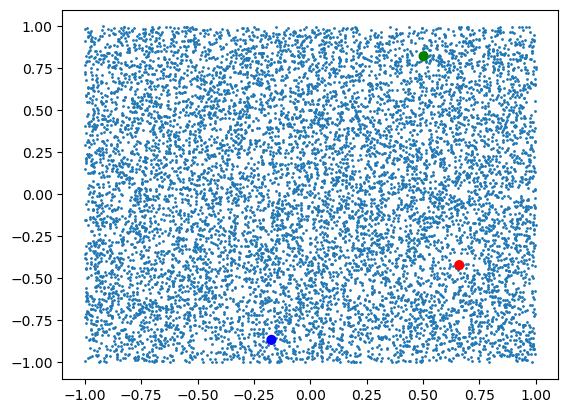

=====  Plurality  =====
red: 2660
green: 3858
blue: 3482

green wins!


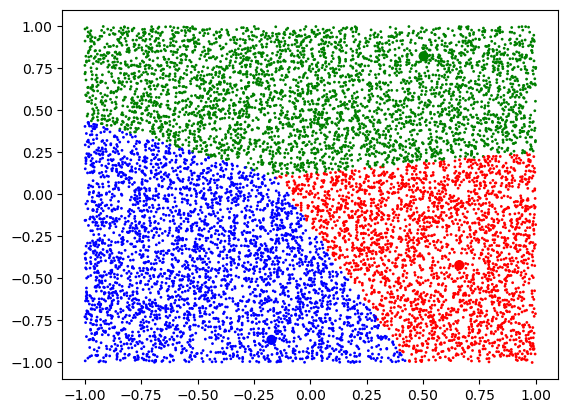

=====  Runoff  =====
red: 2660
green: 3858
blue: 3482

Removing red
green: 4796
blue: 5204

blue wins!


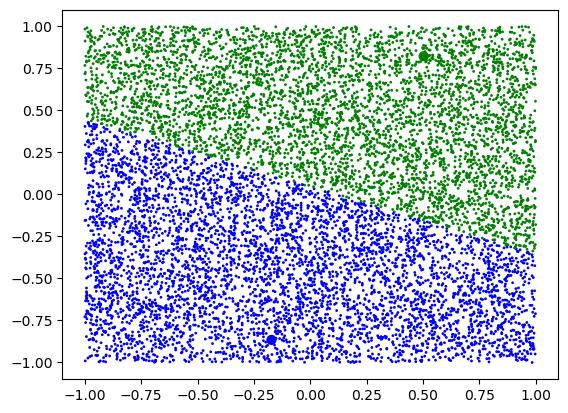

=====  Approval  =====
red: 4704
green: 3836
blue: 4358

red wins!



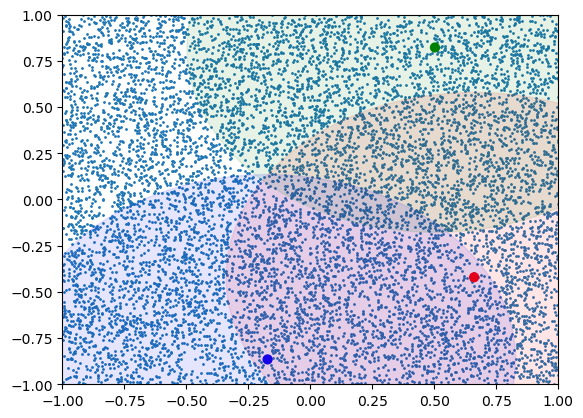

Average 'approval' of red: 0.979
Average 'approval' of green: 0.870
Average 'approval' of blue: 0.913

Average distance of red from other candidates: 1.099
Average distance of green from other candidates: 1.536
Average distance of blue from other candidates: 1.381


'red'

In [46]:
graph = True
plot_data(pop, r_choices, colors)
plurality(pop, r_choices, r_dists, colors, graph=graph)
instant_runoff(pop, r_choices, r_dists, colors, graph=graph)
approval(pop, r_choices, r_dists, colors, graph=graph)
print_approvals(pop, r_choices, r_dists)

<h1>Playground

Play around with different variables and see how it affects the elections with random candidates.

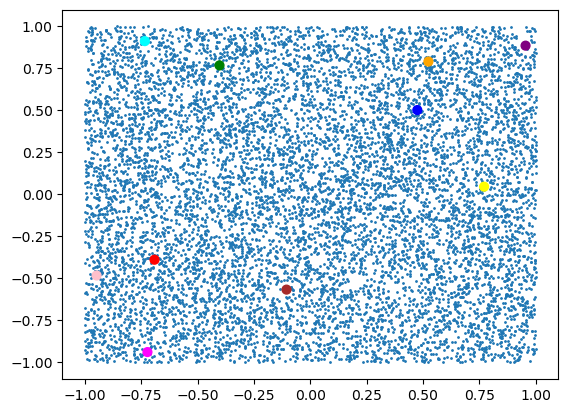

=====  Plurality  =====
red: 1255
green: 1399
blue: 1113
purple: 309
yellow: 1787
cyan: 627
magenta: 484
orange: 571
pink: 287
brown: 2168

brown wins!


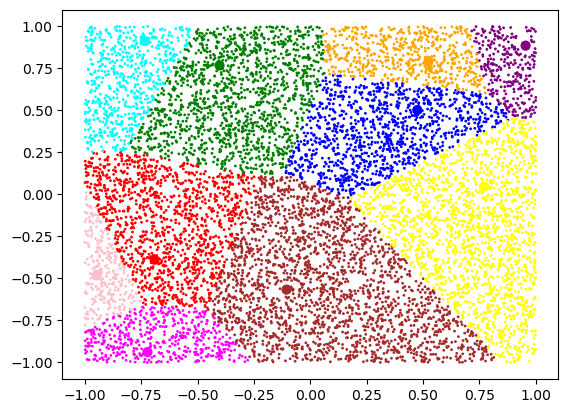

=====  Runoff  =====
red: 1255
green: 1399
blue: 1113
purple: 309
yellow: 1787
cyan: 627
magenta: 484
orange: 571
pink: 287
brown: 2168

Removing pink
red: 1503
green: 1399
blue: 1113
purple: 309
yellow: 1787
cyan: 627
magenta: 523
orange: 571
brown: 2168

Removing purple
red: 1503
green: 1399
blue: 1159
yellow: 1796
cyan: 627
magenta: 523
orange: 825
brown: 2168

Removing magenta
red: 1911
green: 1399
blue: 1159
yellow: 1796
cyan: 627
orange: 825
brown: 2283

Removing cyan
red: 1919
green: 2018
blue: 1159
yellow: 1796
orange: 825
brown: 2283

Removing orange
red: 1919
green: 2044
blue: 1958
yellow: 1796
brown: 2283

Removing yellow
red: 1919
green: 2044
blue: 3007
brown: 3030

Removing red
green: 2413
blue: 3007
brown: 4580

Removing green
blue: 4676
brown: 5324

brown wins!


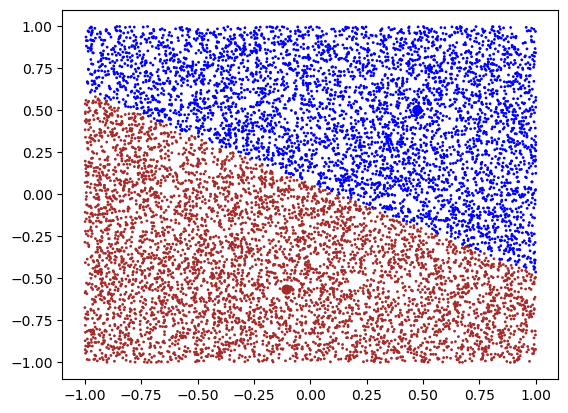

=====  Approval  =====
red: 4667
green: 4319
blue: 5108
purple: 2350
yellow: 5013
cyan: 2861
magenta: 2845
orange: 3912
pink: 3411
brown: 5914

brown wins!


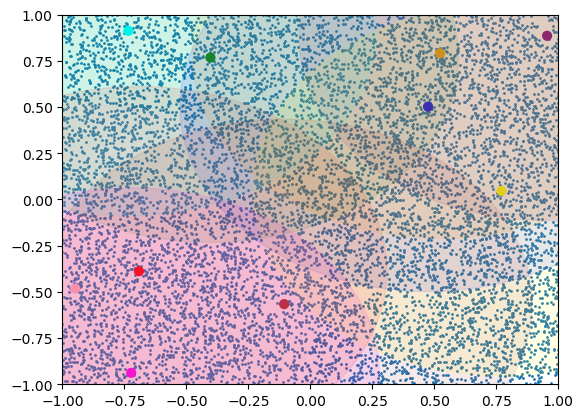

Average 'approval' of red: 0.973
Average 'approval' of green: 0.926
Average 'approval' of blue: 1.033
Average 'approval' of purple: 0.699
Average 'approval' of yellow: 0.978
Average 'approval' of cyan: 0.761
Average 'approval' of magenta: 0.755
Average 'approval' of orange: 0.878
Average 'approval' of pink: 0.816
Average 'approval' of brown: 1.100

Average distance of red from other candidates: 1.188
Average distance of green from other candidates: 1.178
Average distance of blue from other candidates: 1.103
Average distance of purple from other candidates: 1.518
Average distance of yellow from other candidates: 1.276
Average distance of cyan from other candidates: 1.388
Average distance of magenta from other candidates: 1.515
Average distance of orange from other candidates: 1.219
Average distance of pink from other candidates: 1.358
Average distance of brown from other candidates: 1.192


'brown'

In [47]:
num_dims = 2  # this is the dimensionality of the belief space; the graphs work for 1, 2, and 3; although they are hard to see with 3
num_choices = 10  # don't do more than 12, that's how many colors I have
pop_size = 10000  # size of population of voters
graph = True  # if you want plots or not
pop, choices, dists, colors = make_data(num_choices=num_choices, num_dims=num_dims, pop_size=pop_size)
if num_dims > 3:
    graph = False
plot_data(pop, choices, colors)
plurality(pop, choices, dists, colors, graph=graph)
instant_runoff(pop, choices, dists, colors, graph=graph)
approval(pop, choices, dists, colors, graph=graph)
print_approvals(pop, choices, dists)

### Trials on larger dataset

Now that we have seen the performance of these three voting methods on two specific examples, lets see how they perform in general. I will run each method for different numbers of random candidates and see how many times each method elects the candidate that has the smallest average distance in the belief space.

In [48]:
num_elections = 50
data = mass_analysis(num_elections)
print(data)

On 2 candidates
On 3 candidates
On 4 candidates
On 5 candidates
On 6 candidates
On 7 candidates
On 8 candidates
On 9 candidates
On 10 candidates
{'plurality': [[2, 50], [3, 42], [4, 18], [5, 24], [6, 23], [7, 15], [8, 20], [9, 10], [10, 7]], 'runoff': [[2, 50], [3, 49], [4, 38], [5, 35], [6, 43], [7, 33], [8, 34], [9, 22], [10, 25]], 'approval': [[2, 48], [3, 48], [4, 48], [5, 49], [6, 47], [7, 45], [8, 50], [9, 49], [10, 50]]}


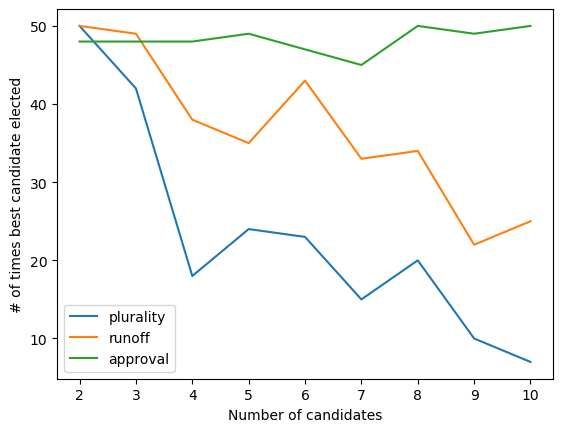

Total correct for plurality: 209
Total correct for runoff: 329
Total correct for approval: 434


In [49]:
plt.plot([j[0] for j in data["plurality"]], [j[1] for j in data["plurality"]], label="plurality")
plt.plot([j[0] for j in data["runoff"]], [j[1] for j in data["runoff"]], label="runoff")
plt.plot([j[0] for j in data["approval"]], [j[1] for j in data["approval"]], label="approval")
plt.xlabel("Number of candidates")
plt.ylabel("# of times best candidate elected")
plt.legend()
plt.show()
print(f"Total correct for plurality: {sum([j[1] for j in data['plurality']])}")
print(f"Total correct for runoff: {sum([j[1] for j in data['runoff']])}")
print(f"Total correct for approval: {sum([j[1] for j in data['approval']])}")

<h1> Conclusion

These three voting systems give VERY different results from each other. From my testing, it seems like the plurality consistently performs the worst of the three systems, approval voting does the best, and runoff is somewhere in the middle. It is worth noting that this simulation runs purely based on actual belief of the voters, while in real life, people may not know their true beliefs, the candidates beliefs, and may lie on the ballot. There is a phenomenon called "strategic voting" that frequently occurs in real life because voters know that voting systems are flawed. In the U.S. for example, voters rarely vote for third party presidential candidates because of the problems discussed above. Instead, they vote for their preference of the top two candidates which basically makes a runoff situation. There are similar ways to strategically vote in all voting systems in real life.

My conclusion is that the best way to vote would be to place everyone in an n-dimensional belief space along with the choices and simply pick the choice with the lowest average distance. No voting necessary!